In [ ]:
import os
from sklearn.preprocessing import LabelEncoder
import pandas as pd
current_path = os.path.abspath('.')
label_encoder = LabelEncoder()
fi=os.path.abspath('../../data/cohortedData.csv')
data = pd.read_csv(fi)
data.fillna(0, inplace=True)

In [ ]:
data['admElective'] = label_encoder.fit_transform(data['admElective'])
data['hadMeasurmentDayOne'] = label_encoder.fit_transform(data['hadMeasurmentDayOne'])


niceColumns=['isMale','english_Proficent','copd_present','diabetes','asthma_present','admElective','hadSteroid','major_surgery'] #, lab values (yes/no, if taken), 'hadSteroid','major_surgery'
#niceColumns=["uti", "biliary", "skin", 'hypertension_present','heart_failure_present','copd_present','cad_present','diabetes','isMale','ckd_stages','hadInsulinDayOne','english_Proficent']

categorical_vars = ['insurance','anchor_year_group','race_group']
dummy_vars = pd.get_dummies(data[categorical_vars])
dummy_vars = dummy_vars.drop(columns=['race_group_White'])
dummy_vars = dummy_vars.drop(columns=['anchor_year_group_2008 - 2010'])
dummy_vars = dummy_vars.drop(columns=['insurance_Other'])


data = pd.concat([data, dummy_vars], axis=1)
continuous_vars = ['age','charlson_comorbidity_index','SOFA']
#,'sofa','cardiovascular','cns','coagulation','liver','renal','respiration'

In [ ]:
catevar=['insurance_Medicaid','insurance_Medicare','anchor_year_group_2011 - 2013','anchor_year_group_2014 - 2016','anchor_year_group_2017 - 2019','race_group_Asian','race_group_Black','race_group_Hispanic']

varsCombined=continuous_vars+catevar+niceColumns
independent = data[varsCombined]
dependent = data['hadMeasurmentDayOne']

In [ ]:
import statsmodels.api as sm

independent = sm.add_constant(independent)
model = sm.Logit(dependent, independent)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.288140
         Iterations 7


In [ ]:
varNames=independent.columns

In [ ]:
import numpy as np

# Get the coefficient values from the result
coefficients = result.params

# Exponentiate the coefficients to get the odds ratios
odds_ratios = np.exp(coefficients)

# Get the confidence intervals for the coefficients
confidence_intervals = result.conf_int()

# Exponentiate the confidence intervals to get the odds ratio confidence intervals
odds_ratio_lower = np.exp(confidence_intervals[0])
odds_ratio_upper = np.exp(confidence_intervals[1])

# Combine odds ratios and confidence intervals into a DataFrame for better readability
ratioCI = pd.DataFrame({'Variable':varNames,'Odds Ratio': odds_ratios, 'CI_lower': odds_ratio_lower, 'CI_upper': odds_ratio_upper})

# Display the odds ratios and their confidence intervals
ratioCI

,Variable,Odds Ratio,CI_lower,CI_upper
const,const,5.906056,4.328866,8.057883
age,age,0.995346,0.991596,0.999110
charlson_comorbidity_index,charlson_comorbidity_index,1.049652,1.028715,1.071015
SOFA,SOFA,1.087409,1.071302,1.103759
insurance_Medicaid,insurance_Medicaid,0.862083,0.721740,1.029717
insurance_Medicare,insurance_Medicare,0.965439,0.871393,1.069635
anchor_year_group_2011 - 2013,anchor_year_group_2011 - 2013,0.903958,0.809601,1.009313
anchor_year_group_2014 - 2016,anchor_year_group_2014 - 2016,1.054995,0.930605,1.196011
anchor_year_group_2017 - 2019,anchor_year_group_2017 - 2019,0.975893,0.835406,1.140005
race_group_Asian,race_group_Asian,0.800649,0.623498,1.028132


In [ ]:
ratioCI['Variable'] = ratioCI['Variable'].replace('insurance_Medicaid', 'Medicaid')
ratioCI['Variable'] = ratioCI['Variable'].replace('insurance_Medicare', 'Medicare')
ratioCI['Variable'] = ratioCI['Variable'].replace('charlson_comorbidity_index', 'Charlson comorbidity index')
ratioCI['Variable'] = ratioCI['Variable'].replace('race_group_Asian', 'Asian')
ratioCI['Variable'] = ratioCI['Variable'].replace('race_group_Black', 'Black')
ratioCI['Variable'] = ratioCI['Variable'].replace('race_group_Hispanic', 'Hispanic')
ratioCI['Variable'] = ratioCI['Variable'].replace('major_surgery', 'Major Surgery')
ratioCI['Variable'] = ratioCI['Variable'].replace('anchor_year_group_2017 - 2019', '2017-2019')
ratioCI['Variable'] = ratioCI['Variable'].replace('anchor_year_group_2014 - 2016', '2014-2016')
ratioCI['Variable'] = ratioCI['Variable'].replace('anchor_year_group_2011 - 2013', '2011-2013')
ratioCI['Variable'] = ratioCI['Variable'].replace('english_Proficent', 'English proficient')
ratioCI['Variable'] = ratioCI['Variable'].replace('age', 'Age')
ratioCI['Variable'] = ratioCI['Variable'].replace('hadSteroid', 'Had steroid')
ratioCI['Variable'] = ratioCI['Variable'].replace('admElective', 'Elective admission')
ratioCI['Variable'] = ratioCI['Variable'].replace('asthma_present', 'Asthma present')
ratioCI['Variable'] = ratioCI['Variable'].replace('diabetes', 'Diabetes present')
ratioCI['Variable'] = ratioCI['Variable'].replace('copd_present', 'COPD present')
ratioCI['Variable'] = ratioCI['Variable'].replace('isMale', 'Sex Male')

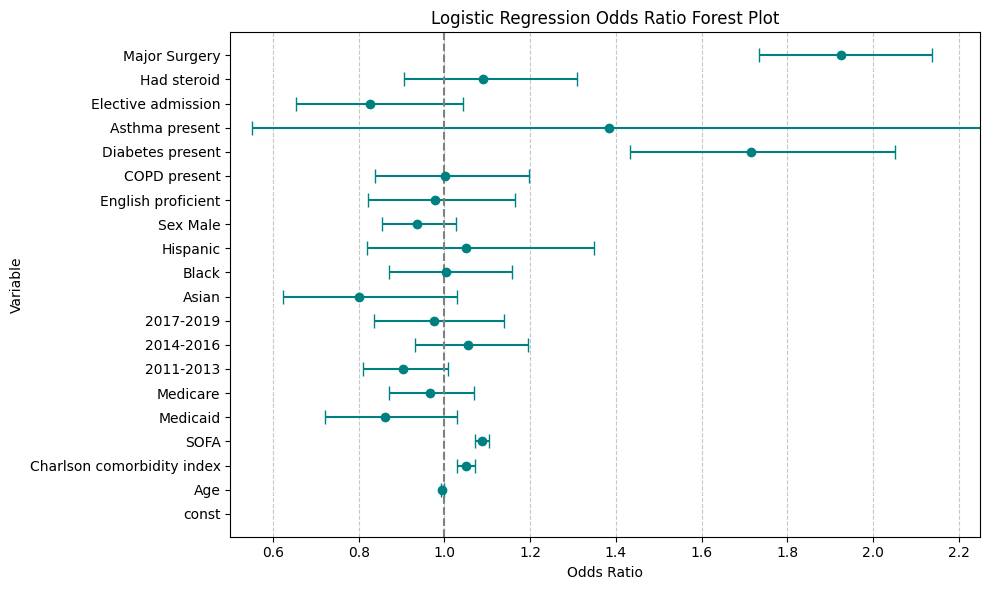

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




# Create the forest plot
plt.figure(figsize=(10, len(ratioCI) * 0.3))  # Adjust the figure size based on the number of variables
plt.errorbar(ratioCI['Odds Ratio'], ratioCI['Variable'], xerr=[ratioCI['Odds Ratio'] - ratioCI['CI_lower'], ratioCI['CI_upper'] - ratioCI['Odds Ratio']],
             fmt='o', color='teal', capsize=5)
plt.axvline(x=1.0, color='gray', linestyle='--')
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Logistic Regression Odds Ratio Forest Plot')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xlim(0.5, 2.25)

plt.show()

#asthma should be with COPD
#steroid together with diabetes
#dag